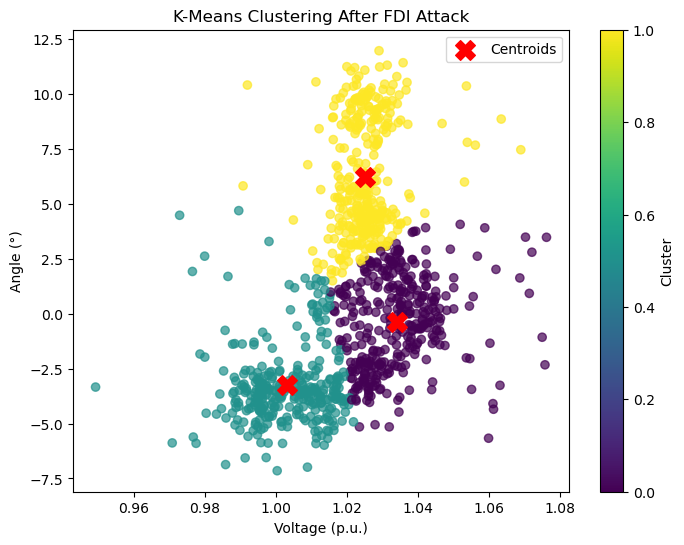

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Load dataset from Excel
file_path = "C:/Users/randh/OneDrive/Documents/internship/bks sir/1000_data.xlsx"
data = pd.read_excel(file_path, sheet_name="Sheet1")

# Extract Voltage and Angle columns
X = data[["Voltage", "Angle"]]

# Simulate FDI Attack: Inject false data into 10% of random points
np.random.seed(42)
attack_indices = np.random.choice(len(X), size=int(0.1 * len(X)), replace=False)
data.loc[attack_indices, "Voltage"] += np.random.uniform(-0.05, 0.05, size=len(attack_indices))
data.loc[attack_indices, "Angle"] += np.random.uniform(-2, 2, size=len(attack_indices))

# Standardize data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(data[["Voltage", "Angle"]])

# Apply K-Means clustering
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
data["Cluster"] = kmeans.fit_predict(X_scaled)
centroids = scaler.inverse_transform(kmeans.cluster_centers_)

# Plot clusters after attack
plt.figure(figsize=(8,6))
plt.scatter(data["Voltage"], data["Angle"], c=data["Cluster"], cmap="viridis", alpha=0.7)
plt.scatter(centroids[:,0], centroids[:,1], c='red', marker='X', s=200, label="Centroids")
plt.xlabel("Voltage (p.u.)")
plt.ylabel("Angle (°)")
plt.title("K-Means Clustering After FDI Attack")
plt.colorbar(label="Cluster")
plt.legend()
plt.show()

